In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import neighbors 
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [7]:
dataset.shape

(889, 12)

In [8]:
dataset1 = dataset.drop(['Cabin', 'Ticket', 'Name'], axis = 1)

In [9]:
enc = preprocessing.LabelEncoder()
dataset1['Sex'] = enc.fit_transform(dataset1.Sex)
dataset1['Embarked'] = enc.fit_transform(dataset1.Embarked)

In [10]:
dataset1.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         2
1              2         1       1    0  38.0      1      0  71.2833         0
2              3         1       3    0  26.0      0      0   7.9250         2
3              4         1       1    0  35.0      1      0  53.1000         2
4              5         0       3    1  35.0      0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
884          887         0       2    1  27.0      0      0  13.0000         2
885          888         1       1    0  19.0      0      0  30.0000         2
886          889         0       3    0  45.0      1      2  23.4500         2
887          890         1       1    1  26.0      0      0  30.0000         0
888          891         0       3    1  32.0      0      0   7.7500         1

[889 rows x 9 columns

In [11]:
X = dataset1.drop(['PassengerId', 'Pclass'], axis = 1)
y = dataset1.Pclass

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
acc_scores = dict()
def KNN(k):
    print(f"\t\t K= {k}")
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    print(f"Accuracy score based on k = {k} using score() \n{round(knn.fit(X_train,y_train).score(X_test,y_test)*100,4)}\n")

    pred1 = knn.predict(X_test)
    
    
    acc_score = round(accuracy_score(y_test, pred1, normalize=True)*100,4)
    print(f"Accuracy score using accuracy_score() \n{acc_score}\n")
    
    conf = confusion_matrix(y_test, pred1)
    lr  = conf[0, 0] + conf[1, 1]
    rl = conf[0, 1] + conf[1, 0]
#     conf_matrix_acc=round((lr/(lr+rl))*100,4)
#     print(f"Accuracy score using accuracy_score() \n{round(conf_matrix_acc*100,4)}")
    print(f"Confusion Matrix: \n{conf}")
    
    acc_scores[k] = acc_score

    
    print("                                                                                         ")
    print("#########################################################################################")
    print("                                                                                         ")

In [19]:
for x in range(1, 623):
    KNN(x)

		 K= 1
Accuracy score based on k = 1 using score() 
89.1386

Accuracy score using accuracy_score() 
89.1386

Confusion Matrix: 
[[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 2
Accuracy score based on k = 2 using score() 
86.5169

Accuracy score using accuracy_score() 
86.5169

Confusion Matrix: 
[[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 3
Accuracy score based on k = 3 using score() 
86.5169

Accuracy score using accuracy_score() 
86.5169



Confusion Matrix: 
[[ 60   6   4]
 [  7  29  13]
 [  5  13 130]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 21
Accuracy score based on k = 21 using score() 
81.2734

Accuracy score using accuracy_score() 
81.2734

Confusion Matrix: 
[[ 60   7   3]
 [  7  27  15]
 [  5  13 130]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 22
Accuracy score based on k = 22 using score() 
79.7753

Accuracy score using accuracy_score() 
79.7753

Confusion Matrix: 
[[ 61   6   3]
 [  7  27  15]
 [  9  14 125]]
                                         

Accuracy score using accuracy_score() 
79.0262

Confusion Matrix: 
[[ 62   5   3]
 [  7  20  22]
 [  7  12 129]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 41
Accuracy score based on k = 41 using score() 
78.2772

Accuracy score using accuracy_score() 
78.2772

Confusion Matrix: 
[[ 61   5   4]
 [  7  19  23]
 [  7  12 129]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 42
Accuracy score based on k = 42 using score() 
78.6517

Accuracy score using accuracy_score() 
78.6517

Confusion Matrix: 
[[ 61   5   4]
 [  7  20  22]
 [  7  12

Accuracy score based on k = 60 using score() 
76.4045

Accuracy score using accuracy_score() 
76.4045

Confusion Matrix: 
[[ 60   5   5]
 [  6  12  31]
 [  5  11 132]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 61
Accuracy score based on k = 61 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 60   5   5]
 [  6  11  32]
 [  5  11 132]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 62
Accuracy score based on k = 62 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion M


Confusion Matrix: 
[[ 55   6   9]
 [  5  11  33]
 [  5   7 136]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 81
Accuracy score based on k = 81 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 56   5   9]
 [  5  11  33]
 [  5   7 136]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 82
Accuracy score based on k = 82 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 57   4   9]
 [  5  10  34]
 [  5   7 136]]
                                                

Accuracy score using accuracy_score() 
73.7828

Confusion Matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5   9 134]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 100
Accuracy score based on k = 100 using score() 
73.7828

Accuracy score using accuracy_score() 
73.7828

Confusion Matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5   9 134]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 101
Accuracy score based on k = 101 using score() 
73.0337

Accuracy score using accuracy_score() 
73.0337

Confusion Matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5


Confusion Matrix: 
[[ 53  11   6]
 [  5  12  32]
 [  5   8 135]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 119
Accuracy score based on k = 119 using score() 
74.9064

Accuracy score using accuracy_score() 
74.9064

Confusion Matrix: 
[[ 53  12   5]
 [  5  12  32]
 [  5   8 135]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 120
Accuracy score based on k = 120 using score() 
74.5318

Accuracy score using accuracy_score() 
74.5318

Confusion Matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
                                    

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 140
Accuracy score based on k = 140 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 141
Accuracy score based on k = 141 using score() 
76.03

Accuracy score using accuracy_score() 
76.03

Confusion Matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]

Accuracy score based on k = 160 using score() 
75.6554

Accuracy score using accuracy_score() 
75.6554

Confusion Matrix: 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 161
Accuracy score based on k = 161 using score() 
75.2809

Accuracy score using accuracy_score() 
75.2809

Confusion Matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 162
Accuracy score based on k = 162 using score() 
75.2809

Accuracy score using accuracy_score() 
75.2809

Accuracy score using accuracy_score() 
74.9064

Confusion Matrix: 
[[ 50   7  13]
 [  5   7  37]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 181
Accuracy score based on k = 181 using score() 
75.6554

Accuracy score using accuracy_score() 
75.6554

Confusion Matrix: 
[[ 52   5  13]
 [  5   7  37]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 182
Accuracy score based on k = 182 using score() 
75.6554

Accuracy score using accuracy_score() 
75.6554

Confusion Matrix: 
[[ 52   5  13]
 [  5   7  37]
 [  5

Accuracy score based on k = 200 using score() 
71.9101

Accuracy score using accuracy_score() 
71.9101

Confusion Matrix: 
[[ 48   6  16]
 [  5   1  43]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 201
Accuracy score based on k = 201 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   6  16]
 [  5   2  42]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 202
Accuracy score based on k = 202 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   3  19]
 [  4   2  43]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 221
Accuracy score based on k = 221 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 222
Accuracy score based on k = 222 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5

Accuracy score based on k = 241 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 242
Accuracy score based on k = 242 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Confusion Matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 243
Accuracy score based on k = 243 using score() 
72.2846

Accuracy score using accuracy_score() 
72.2846

Accuracy score using accuracy_score() 
71.9101

Confusion Matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 261
Accuracy score based on k = 261 using score() 
71.9101

Accuracy score using accuracy_score() 
71.9101

Confusion Matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 262
Accuracy score based on k = 262 using score() 
71.9101

Accuracy score using accuracy_score() 
71.9101

Confusion Matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5

Accuracy score based on k = 279 using score() 
71.161

Accuracy score using accuracy_score() 
71.161

Confusion Matrix: 
[[ 47   1  22]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 280
Accuracy score based on k = 280 using score() 
71.161

Accuracy score using accuracy_score() 
71.161

Confusion Matrix: 
[[ 47   0  23]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 281
Accuracy score based on k = 281 using score() 
71.161

Accuracy score using accuracy_score() 
71.161

Conf

#########################################################################################
                                                                                         
		 K= 299
Accuracy score based on k = 299 using score() 
70.412

Accuracy score using accuracy_score() 
70.412

Confusion Matrix: 
[[ 45   0  25]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 300
Accuracy score based on k = 300 using score() 
70.412

Accuracy score using accuracy_score() 
70.412

Confusion Matrix: 
[[ 45   0  25]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                

Accuracy score using accuracy_score() 
68.5393

Confusion Matrix: 
[[ 40   3  27]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 318
Accuracy score based on k = 318 using score() 
68.5393

Accuracy score using accuracy_score() 
68.5393

Confusion Matrix: 
[[ 40   3  27]
 [  4   0  45]
 [  5   0 143]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 319
Accuracy score based on k = 319 using score() 
68.5393

Accuracy score using accuracy_score() 
68.5393

Confusion Matrix: 
[[ 40   3  27]
 [  4   0  45]
 [  5


Confusion Matrix: 
[[ 37   2  31]
 [  2   0  47]
 [  2   1 145]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 337
Accuracy score based on k = 337 using score() 
68.1648

Accuracy score using accuracy_score() 
68.1648

Confusion Matrix: 
[[ 37   3  30]
 [  2   0  47]
 [  2   1 145]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 338
Accuracy score based on k = 338 using score() 
68.1648

Accuracy score using accuracy_score() 
68.1648

Confusion Matrix: 
[[ 37   3  30]
 [  2   0  47]
 [  2   1 145]]
                                    


Accuracy score using accuracy_score() 
66.2921

Confusion Matrix: 
[[ 28   0  42]
 [  0   1  48]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 356
Accuracy score based on k = 356 using score() 
66.2921

Accuracy score using accuracy_score() 
66.2921

Confusion Matrix: 
[[ 28   0  42]
 [  0   1  48]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 357
Accuracy score based on k = 357 using score() 
65.9176

Accuracy score using accuracy_score() 
65.9176

Confusion Matrix: 
[[ 27   1  42]
 [  0   1  48]
 [  

Accuracy score using accuracy_score() 
62.1723

Confusion Matrix: 
[[ 18   0  52]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 376
Accuracy score based on k = 376 using score() 
61.7978

Accuracy score using accuracy_score() 
61.7978

Confusion Matrix: 
[[ 17   0  53]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 377
Accuracy score based on k = 377 using score() 
61.7978

Accuracy score using accuracy_score() 
61.7978

Confusion Matrix: 
[[ 17   0  53]
 [  0   0  49]
 [  0

		 K= 395
Accuracy score based on k = 395 using score() 
59.5506

Accuracy score using accuracy_score() 
59.5506

Confusion Matrix: 
[[ 11   0  59]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 396
Accuracy score based on k = 396 using score() 
59.176

Accuracy score using accuracy_score() 
59.176

Confusion Matrix: 
[[ 10   0  60]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 397
Accuracy score based on k = 397 using score() 
58.8015

Accuracy score using accuracy_score() 

Accuracy score based on k = 415 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 416
Accuracy score based on k = 416 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 417
Accuracy score based on k = 417 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Accuracy score based on k = 435 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 436
Accuracy score based on k = 436 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 437
Accuracy score based on k = 437 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307


Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 455
Accuracy score based on k = 455 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 456
Accuracy score based on k = 456 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  


Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 474
Accuracy score based on k = 474 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 475
Accuracy score based on k = 475 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                    

Accuracy score based on k = 493 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 494
Accuracy score based on k = 494 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 495
Accuracy score based on k = 495 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 514
Accuracy score based on k = 514 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 515
Accuracy score based on k = 515 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0

Accuracy score based on k = 533 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 534
Accuracy score based on k = 534 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 535
Accuracy score based on k = 535 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 553
Accuracy score based on k = 553 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 554
Accuracy score based on k = 554 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 572
Accuracy score based on k = 572 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 573
Accuracy score based on k = 573 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 591
Accuracy score based on k = 591 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 592
Accuracy score based on k = 592 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 611
Accuracy score based on k = 611 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0   0 148]]
                                                                                         
#########################################################################################
                                                                                         
		 K= 612
Accuracy score based on k = 612 using score() 
55.4307

Accuracy score using accuracy_score() 
55.4307

Confusion Matrix: 
[[  0   0  70]
 [  0   0  49]
 [  0

In [20]:
scores = acc_scores.values()
ks = acc_scores.keys()

max_score = max(scores)
max_k = list(ks)[list(scores).index(max_score)]

max_k, max_score

(1, 89.1386)

Maximum accuracy: 89.1386 at k = 1


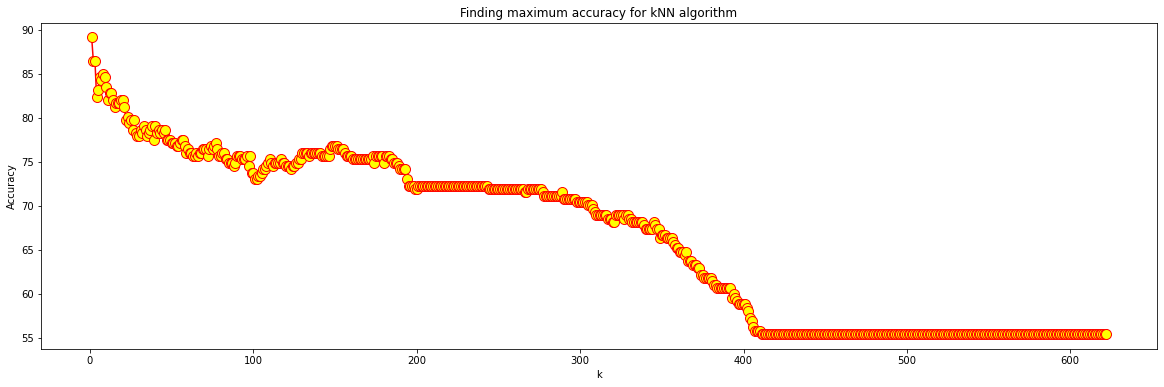

In [26]:
plt.figure(figsize=(20,6))
plt.plot(list(ks),list(scores),color = 'red', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Finding maximum accuracy for kNN algorithm')
plt.xlabel('k')
plt.ylabel('Accuracy')
print(f"Maximum accuracy: {max_score} at k = {max_k}")